**2. Análisis Exploratorio de Datos (EDA)**

EDA, es una etapa crucial en la cual se busca comprender la estructura y descubrir patrones en los datos, así como las relaciones entre variables.

En este caso, voy a explorar el conjunto de datos llamado ML_cars.csv. 

Durante esta fase, utilizare diferentes visualizaciones y técnicas para identificar tendencias y extraer información valiosa.

El objetivo aquí es entender mejor los datos. 

Algunas cosas que podrías hacer son:
- Descripción general de los datos.
- Verificar si hay valores faltantes.
- Visualizar las relaciones entre variables mediante gráficos de dispersión y correlación.

**Cargar el archivo con los datos**

In [17]:
import pandas as pd

try:
    cars = pd.read_csv(r'C:\\Users\\NOTEBOOK\\Desktop\\DATA SCIENCE\\MODULO 6\\Proyecto_Integrador\\PROYECTO-INTEGRADOR-M6\\ML_cars.csv')
    print("* Los datos fueron cargados correctamente.")
except FileNotFoundError:
    print("* Error: El archivo no se encuentra en la ubicación especificada.")

* Los datos fueron cargados correctamente.


**Descripción general de los datos**

In [18]:
# Obtener estructura del dataset (nombres de columnas, tipos de datos, valores no nulos)
print("- " * 25)
print("* Información del dataset:")
print("- " * 25)
print(cars.info())

- - - - - - - - - - - - - - - - - - - - - - - - - 
* Información del dataset:
- - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetyp

Al revisar la estructura de mi dataset, veo que consta de 205 registros y 26 columnas, todas sin valores nulos. Esto es positivo, ya que indica que tengo un conjunto de datos limpio para trabajar. Las columnas incluyen tanto variables numéricas como categóricas, lo que me permitirá realizar un análisis exhaustivo. En particular, datos como el precio, la potencia del motor y las dimensiones del vehículo serán cruciales para el desarrollo de mis modelos predictivos, tanto para la clasificación de vehículos en gama alta y baja como para la predicción de precios.

In [19]:
# Obtener Estadísticas Descriptiva de los datos numéricos, como media, desviación estándar, mínimo, máximo, etc.
print("- " * 40)
print("* Descripción estadística de las variables numéricas:")
print("- " * 40)
print(cars.describe())

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Descripción estadística de las variables numéricas:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke

Al analizar la descripción estadística de las variables numéricas, puedo observar que hay una variabilidad significativa en los precios de los vehículos, que van desde 5,118 hasta 45,400. El precio medio es de aproximadamente 13,277, lo que me indica que hay varios modelos de bajo costo que podrían influir en la mediana de precios para mi modelo de clasificación. Además, variables como la potencia del motor (horsepower) y el tamaño del motor (enginesize) muestran una variabilidad considerable, lo que sugiere que estas características podrían ser factores determinantes tanto en la clasificación de vehículos de gama alta y baja como en la predicción de precios. Las diferencias en el rendimiento de combustible (citympg y highwaympg) también serán importantes al considerar las preferencias del mercado.

In [20]:
# Obtener Visualización de las primeras filas del dataset
print("- " * 15)
print("* Primeras filas del dataset:")
print("- " * 15)
cars.head()

- - - - - - - - - - - - - - - 
* Primeras filas del dataset:
- - - - - - - - - - - - - - - 


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Al observar los primeros registros de mi conjunto de datos, noto que contiene información clave sobre los vehículos, como el nombre del modelo, el tipo de combustible y la potencia del motor. Estos detalles serán útiles para identificar patrones y clasificar los automóviles en gama alta y baja, así como para predecir sus precios. Esta información será fundamental para avanzar en el análisis y la construcción de mis modelos predictivos.

In [21]:
import numpy as np 

# Obtener los tipos de datos de cada columna en el DataFrame
column_types = cars.dtypes
print("- - " * 35)
print(f"* NÚMERO TOTAL DE VARIABLES: {len(column_types)}")
print("- - " * 35)

# Inicializar contadores
discrete_count = 0
continuous_count = 0
categorical_count = 0

# Inicializar listas para almacenar nombres de columnas
discrete_columns = []
continuous_columns = []
categorical_columns = []

# Clasificar las columnas según su tipo de dato
for col, dtype in column_types.items():
    if np.issubdtype(dtype, np.integer):
        discrete_count += 1
        discrete_columns.append(col)
    elif np.issubdtype(dtype, np.floating):
        continuous_count += 1
        continuous_columns.append(col)
    elif np.issubdtype(dtype, 'object') or pd.api.types.is_categorical_dtype(dtype):
        categorical_count += 1
        categorical_columns.append(col)

# Imprimir resultados
print(f"* VARIABLES DISCRETAS:\n  * Número de variables: {discrete_count} \n  * Variables: [{', '.join(discrete_columns)}]")  
print("- - " * 35)

print(f"* VARIABLES CONTINUAS:\n  * Número de variables: {continuous_count} \n  * Variables: [{', '.join(continuous_columns)}]")  
print("- - " * 35)

print(f"* VARIABLES CATEGÓRICAS:\n  * Número de variables: {categorical_count} \n  * Variables: [{', '.join(categorical_columns)}]")  
print("- - " * 35)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* NÚMERO TOTAL DE VARIABLES: 26
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* VARIABLES DISCRETAS:
  * Número de variables: 8 
  * Variables: [car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* VARIABLES CONTINUAS:
  * Número de variables: 8 
  * Variables: [wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio, price]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* VARIABLES CATEGÓRICAS:
  * Número de variables: 10 
  * Variables: [CarName, fueltype, aspiratio

En mi análisis del dataset, he identificado que hay un total de 26 variables, distribuidas en tres categorías: 8 variables discretas, 8 variables continuas y 10 variables categóricas. Esto me da una visión clara de la estructura de los datos. Las variables discretas, como curbweight y horsepower, podrían ayudar a establecer correlaciones directas con el precio, mientras que las continuas, como price y carlength, me permitirán explorar relaciones más complejas. Las variables categóricas, especialmente CarName y fuelsystem, serán clave para segmentar los datos y entender cómo diferentes características del vehículo afectan su clasificación y valor en el mercado. Esta categorización es fundamental para planificar los próximos pasos en la modelización y análisis de los datos.

**Verificar si hay valores faltantes.**

In [22]:
# Verificar valores faltantes (valores nulos)
print("* Valores faltantes o nulos en cada columna son:")
print("- " * 25)
print(cars.isnull().sum())

* Valores faltantes o nulos en cada columna son:
- - - - - - - - - - - - - - - - - - - - - - - - - 
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


Al revisar los datos, he confirmado que no hay valores faltantes en ninguna de las 26 columnas del dataset. Esto es positivo, ya que significa que puedo proceder con el análisis y la modelización sin la necesidad de realizar imputaciones o limpieza adicional relacionada con datos ausentes. Mantener la integridad de los datos es crucial para asegurar que los resultados del modelo sean confiables y representativos. Ahora, puedo centrarme en las transformaciones necesarias y en el análisis exploratorio de las variables para avanzar en mi proyecto.

In [23]:
# Verificar si hay filas duplicadas
duplicate_rows = cars[cars.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"* Filas duplicadas son: {num_duplicate_rows}")

* Filas duplicadas son: 0


He verificado que no hay filas duplicadas en el dataset, lo cual es un buen indicador de la calidad de los datos. Esto significa que cada registro es único y puedo confiar en que el análisis y la modelización que realice estarán basados en datos precisos y no redundantes. Con esta confirmación, puedo seguir adelante con las etapas de análisis exploratorio y preparación de datos sin preocuparme por inconsistencias en los registros.

**Visualizar las relaciones entre variables mediante gráficos de dispersión y correlación.**

**Matriz de Correlación**

Este gráfico muestra la correlación entre todas las variables numéricas. Es útil para identificar qué variables están más fuertemente correlacionadas con el precio y entre sí.

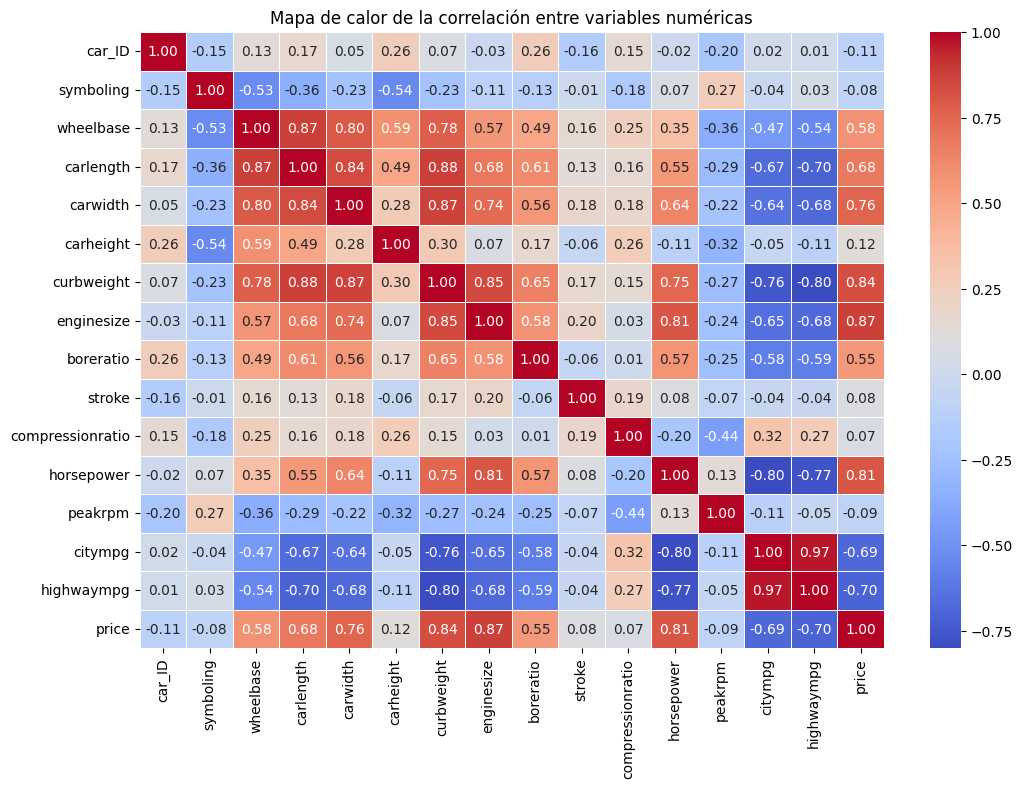

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas numéricas
numerical_columns = cars.select_dtypes(include=['int64', 'float64']).columns

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = cars[numerical_columns].corr()

# Visualizar la matriz de correlación mediante un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

Este mapa de calor me permite identificar rápidamente las variables más correlacionadas con el precio, como `curbweight`, `horsepower` y `enginesize`. Esta observación me será útil para priorizar estas variables en la etapa de modelamiento y mejorar la precisión de las predicciones.

**Gráficos para Variables Numéricas**

- **Gráficos de Dispersión (Scatter Plots)**

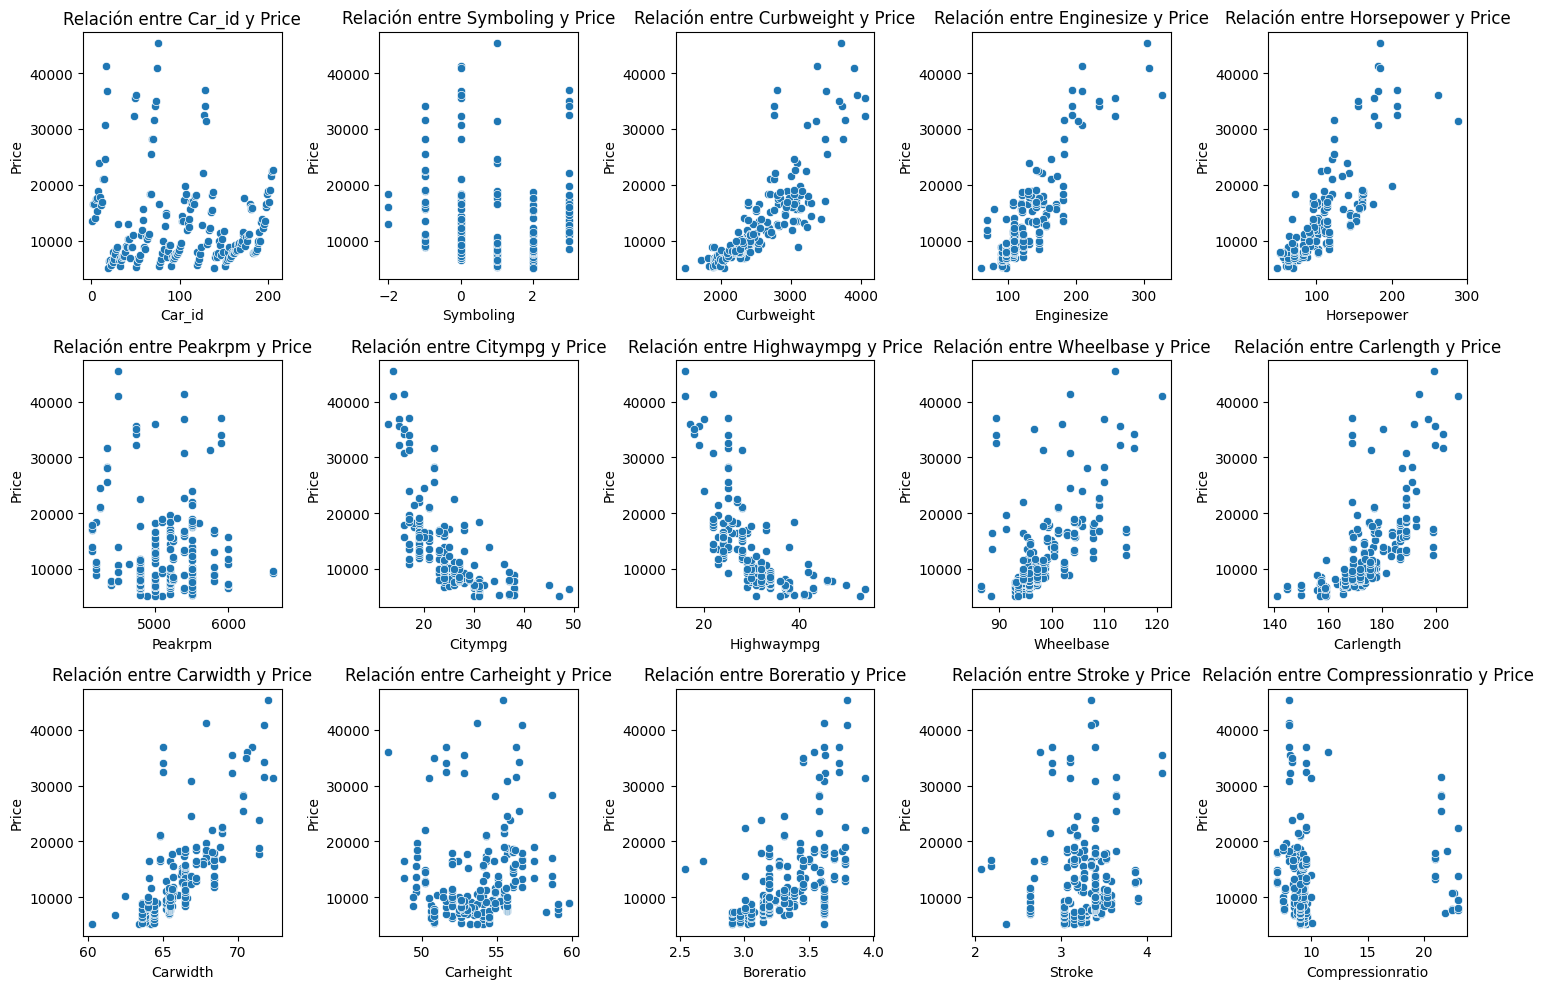

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de pares de variables para graficar
variables = ['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio']
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 5, i)
    sns.scatterplot(data=cars, x=var, y='price')
    plt.title(f'Relación entre {var.capitalize()} y Price')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


A partir de los gráficos de dispersión, puedo observar varias relaciones clave entre las variables numéricas y el precio. Se destacan correlaciones positivas significativas, especialmente entre variables como `curbweight`, `enginesize`, y `horsepower` con el precio, lo que sugiere que vehículos más pesados y con motores más potentes tienden a ser más caros. Por otro lado, la relación inversa de las variables de eficiencia de combustible (`citympg` y `highwaympg`) con el precio también es notable. Estos hallazgos me servirán como base para priorizar las variables en la construcción de los modelos predictivos.

- **Histogramas**

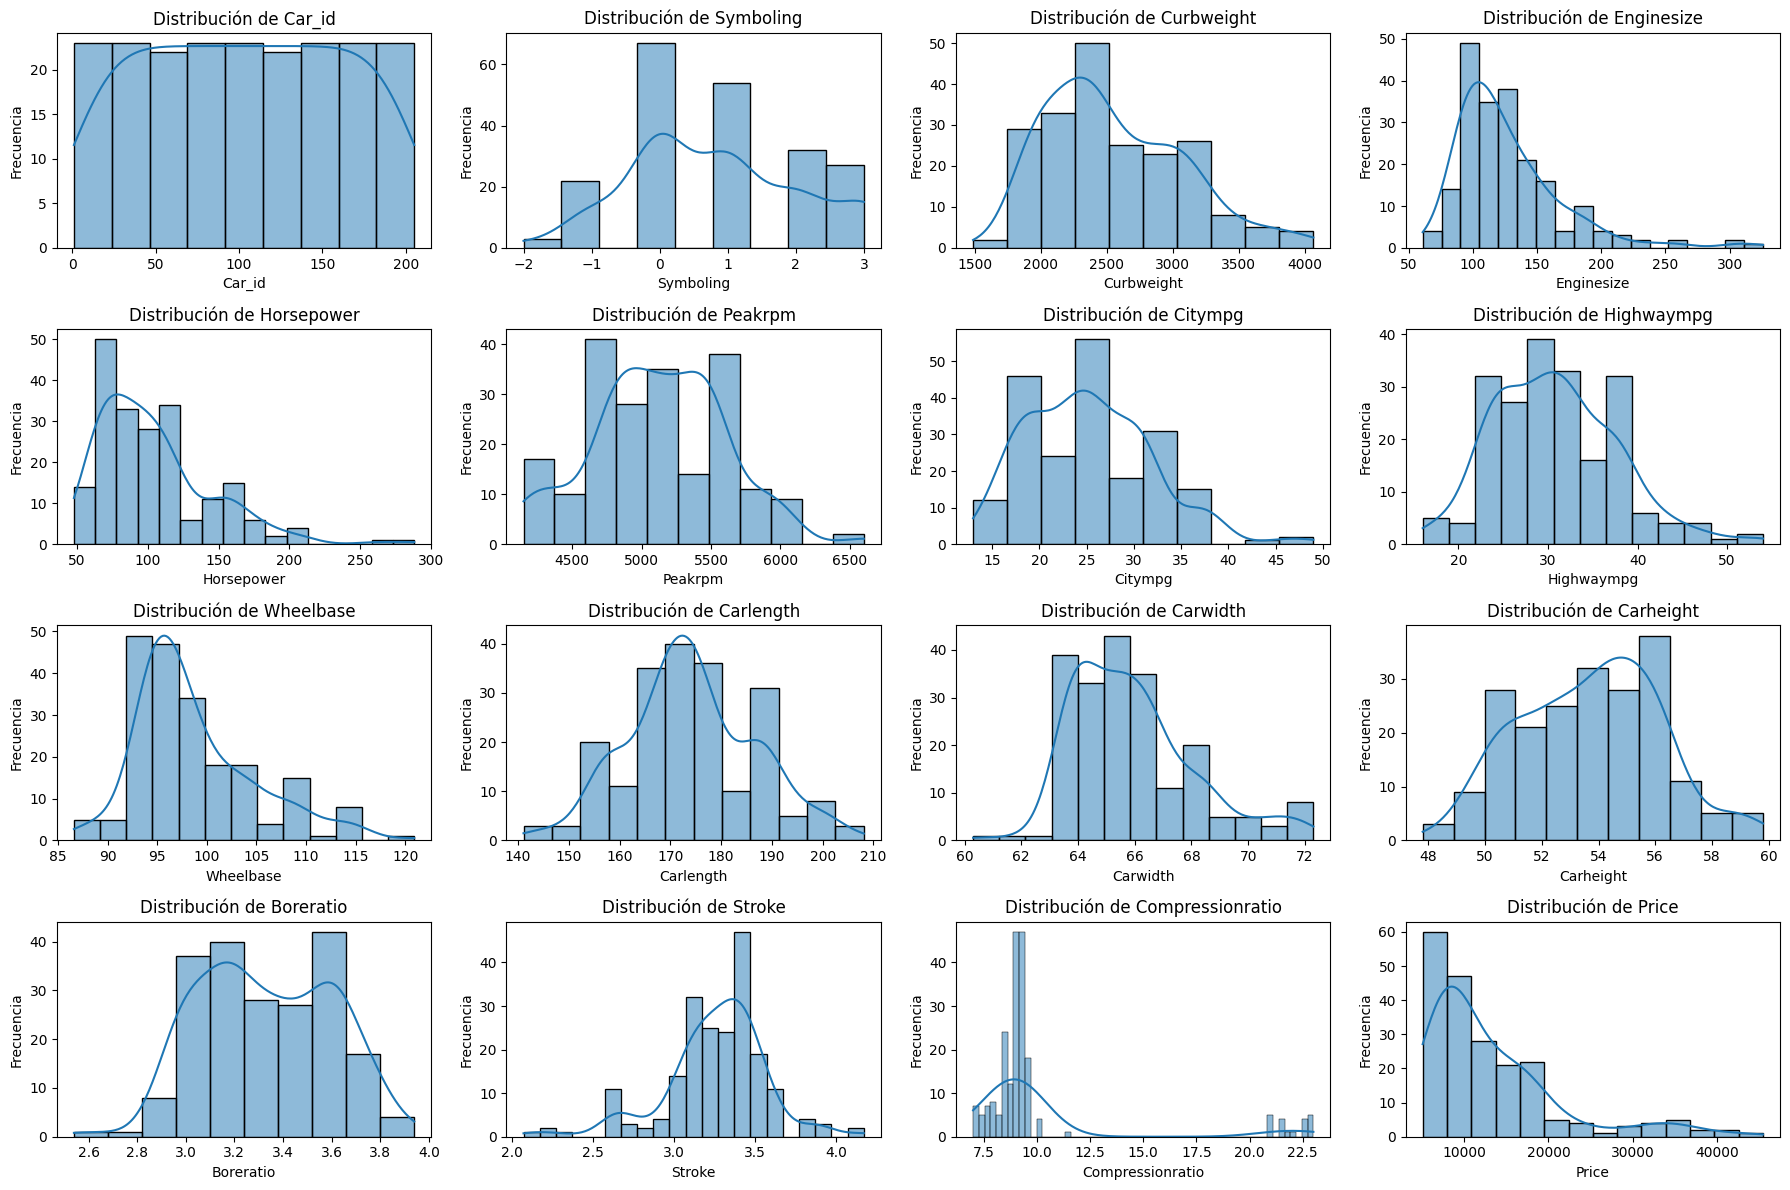

In [26]:
# Lista de variables numéricas para los histogramas
numeric_vars = ['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 
                'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 
                'boreratio', 'stroke', 'compressionratio', 'price']

plt.figure(figsize=(18, 12))

# Loop para generar histogramas
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 4, i)  # Cambiado a 4 filas y 4 columnas
    sns.histplot(data=cars, x=var, kde=True)
    plt.title(f'Distribución de {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


En este conjunto de histogramas, puedo observar la distribución de cada una de las variables numéricas. Algunas variables, como el peso (`curbweight`), el tamaño del motor (`enginesize`), y el precio (`price`), presentan distribuciones sesgadas hacia la derecha, lo cual es común en datos relacionados con precios y características físicas de productos. Otras variables, como la relación de compresión (`compressionratio`), tienen una distribución más concentrada en ciertos valores, lo que podría influir en su relevancia para la predicción del precio. Este análisis me servirá para identificar posibles transformaciones necesarias, como la normalización o el escalado de los datos, además de ayudarme a evaluar qué variables podrían tener una mayor influencia en los modelos predictivos.

- **Matriz de Correlación con Máscara:**

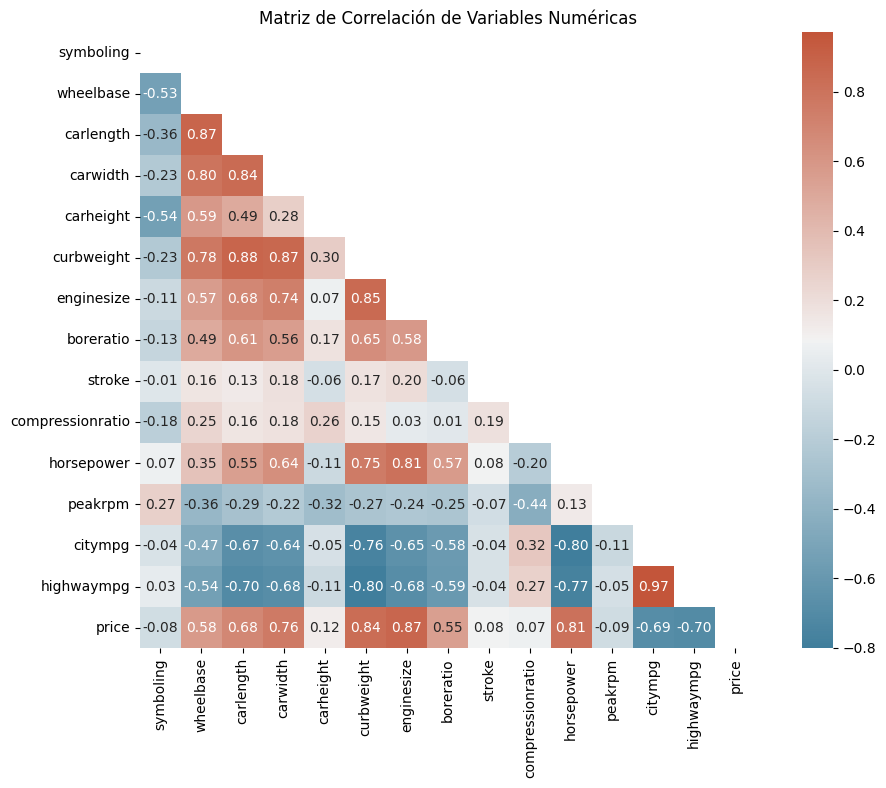

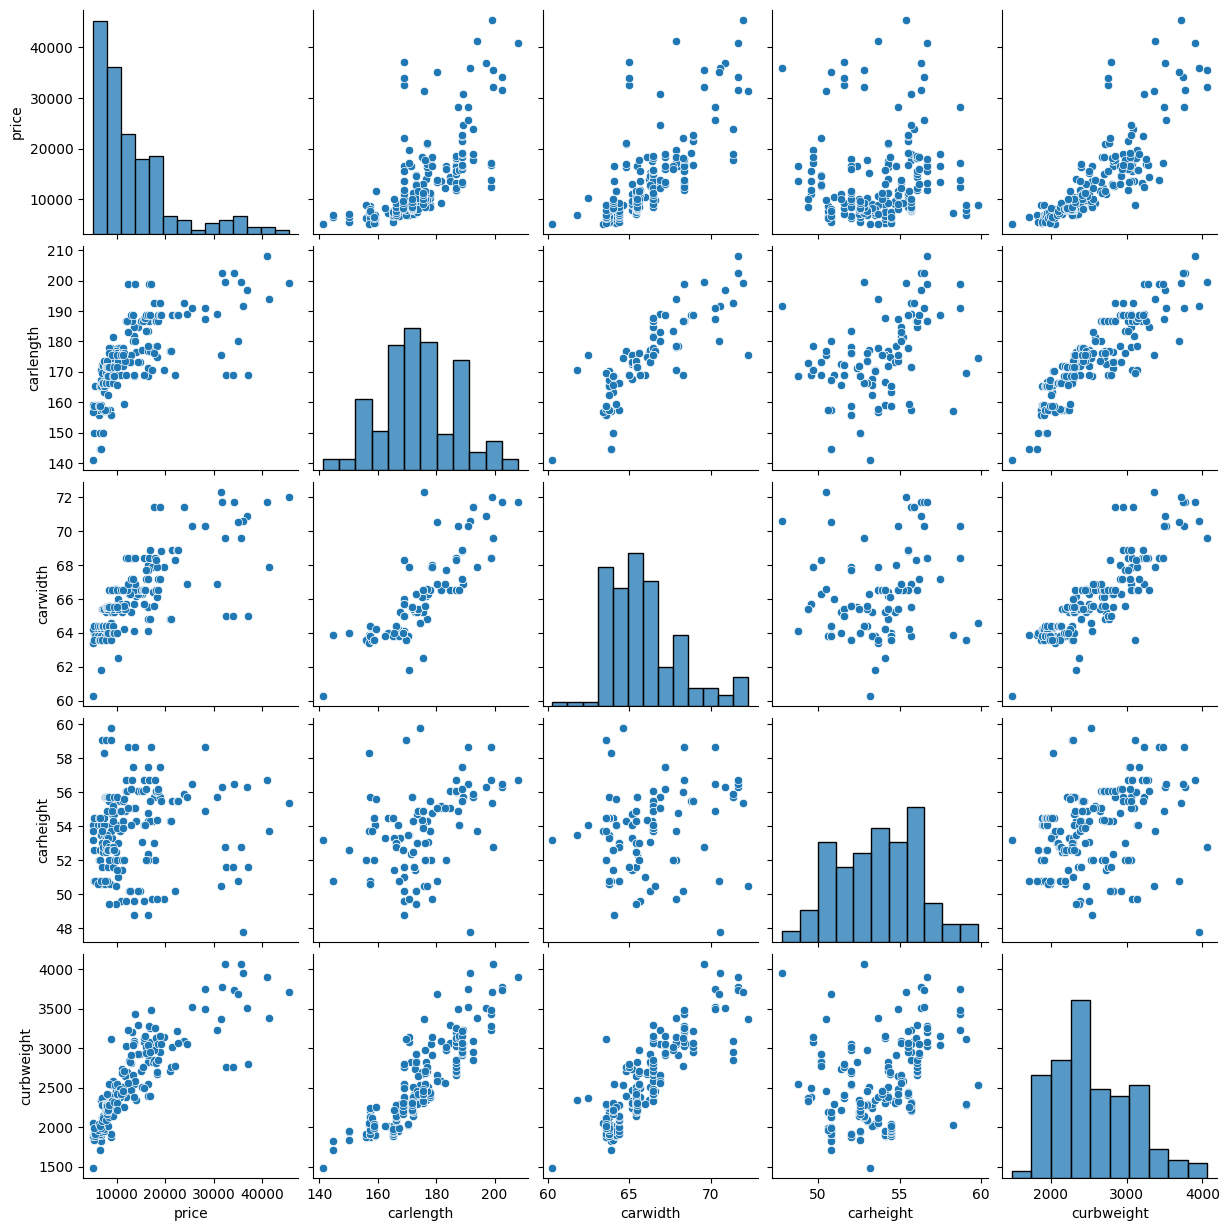

In [27]:
# Excluir la columna 'car_ID' y seleccionar columnas numéricas
numeric_columns = cars.drop('car_ID', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Crear el heatmap con la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f', square=True)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

# Scatter plot con colores de la matriz de correlación
cols = ['price', 'carlength', 'carwidth', 'carheight', 'curbweight']

# Crear el pairplot
sns.pairplot(cars[cols], height=2.5)
plt.show()


En esta matriz de gráficos de dispersión, puedo identificar las relaciones entre varias variables importantes, como el precio, el peso (`curbweight`), la longitud (`carlength`), el ancho (`carwidth`) y la altura del vehículo (`carheight`). Las correlaciones más evidentes se observan entre variables como el peso, el ancho, y la longitud, todas las cuales muestran una tendencia positiva con el precio. Estas variables podrían ser predictores clave en los modelos que voy a desarrollar. La siguiente etapa será cuantificar estas relaciones utilizando análisis de correlación más formal para confirmar cuáles variables tienen mayor impacto sobre el precio.

- **Boxplot**

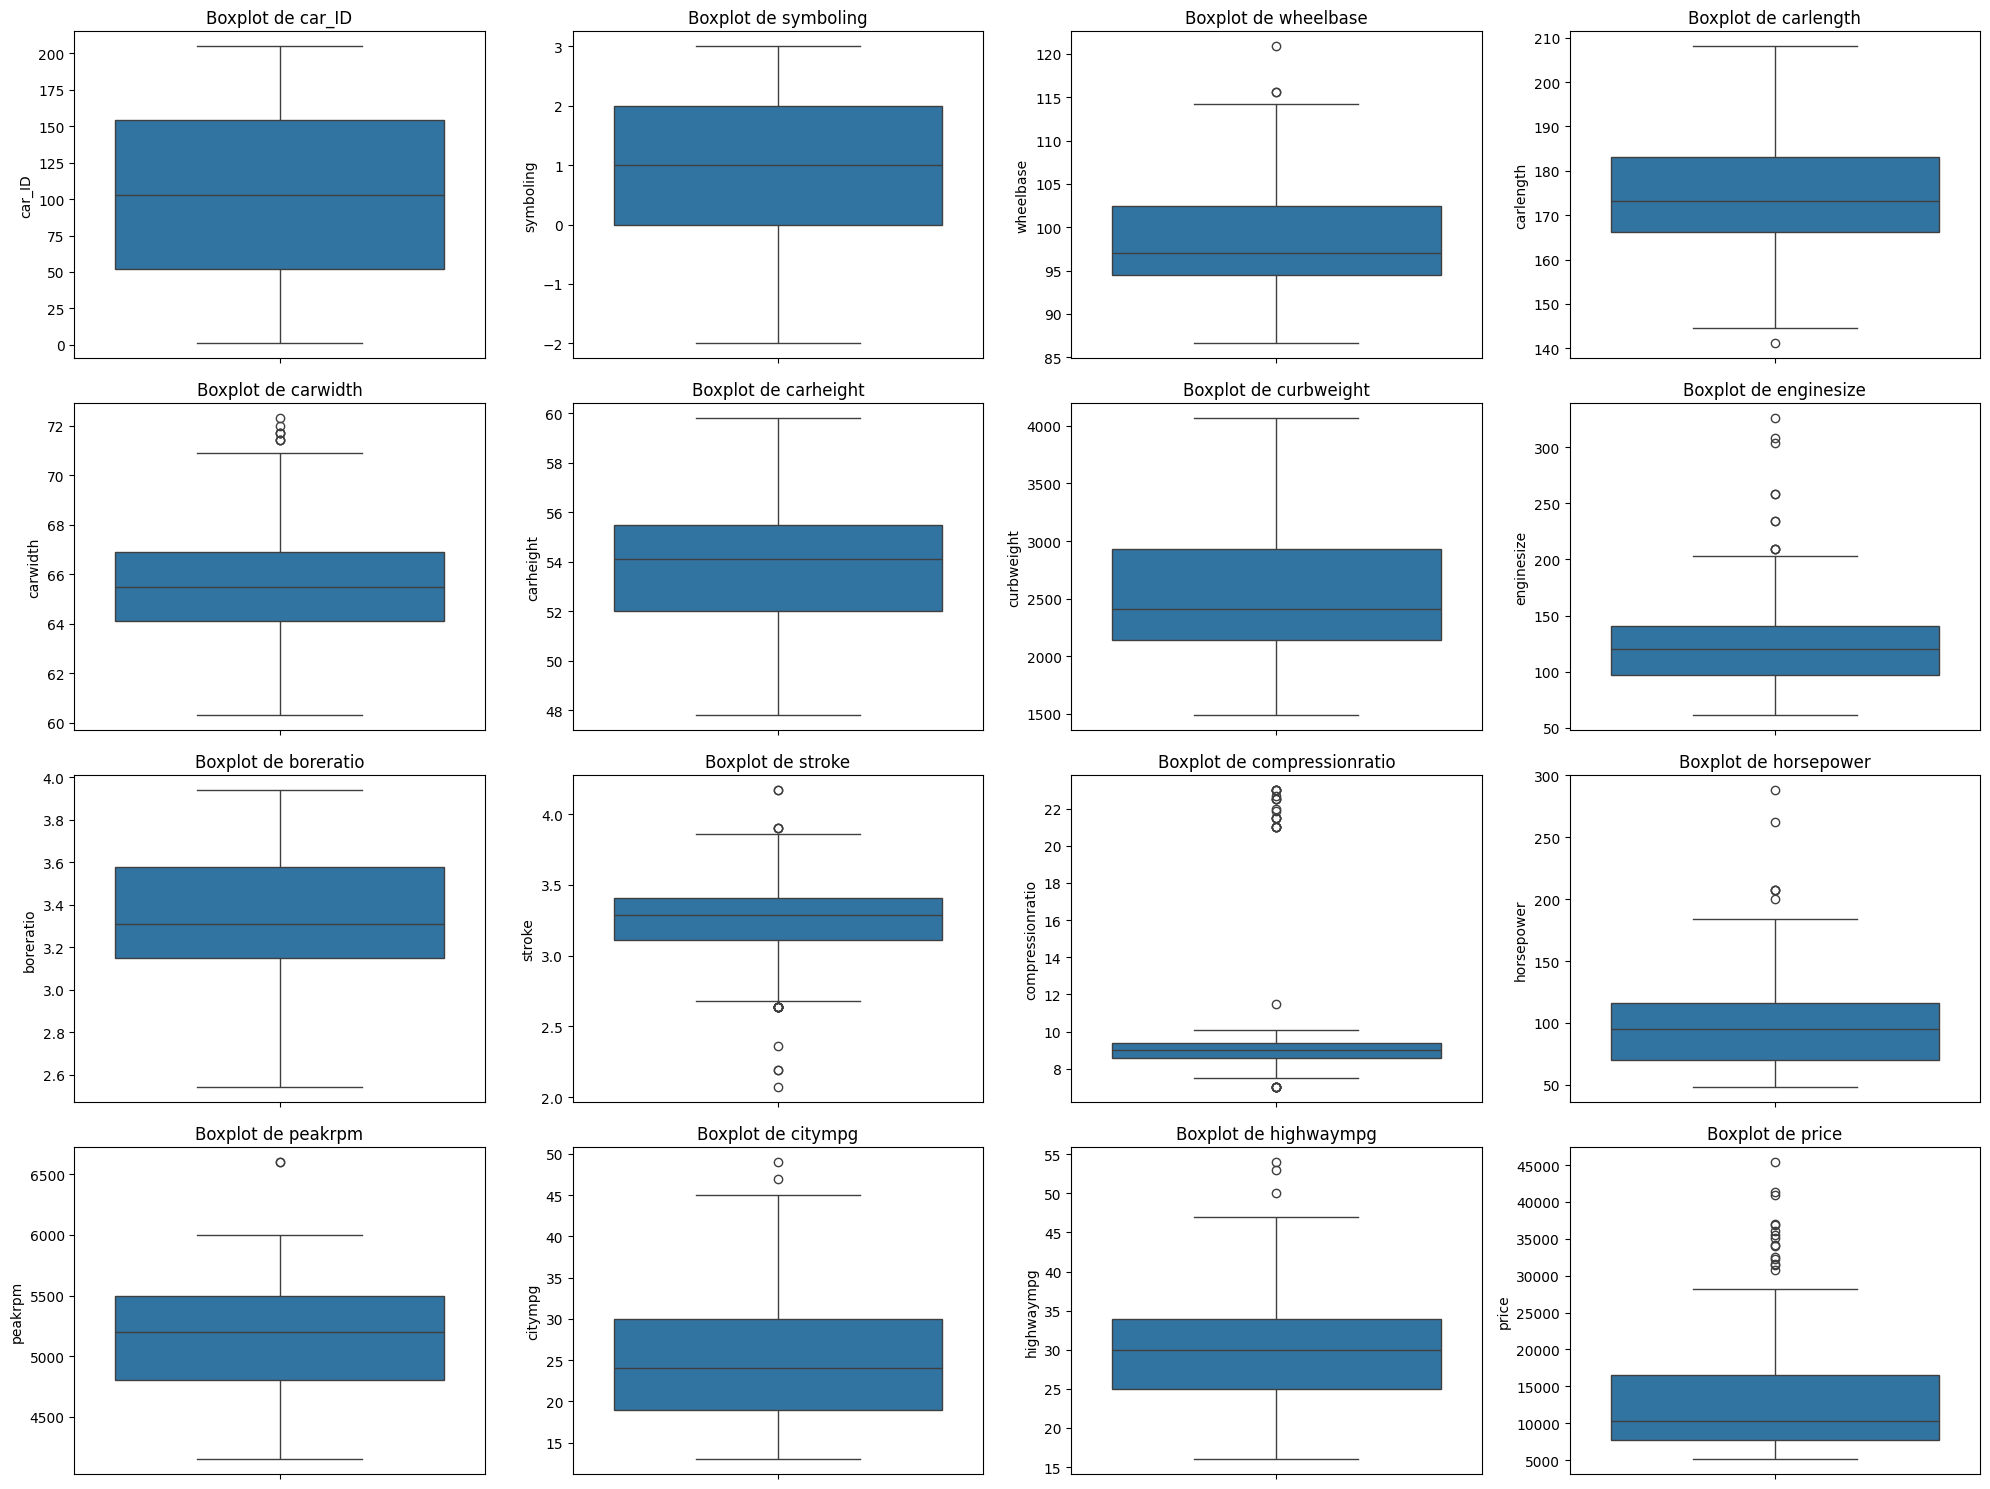

In [28]:
# Seleccionar columnas continuas
continuous_columns = cars.select_dtypes(include=[np.float64, np.int64]).columns

# Crear una figura con 4 filas y 4 columnas (ajustar filas y columnas según el número de variables)
plt.figure(figsize=(20, 15))  # Ajusta el tamaño según sea necesario

for i, col in enumerate(continuous_columns):
    plt.subplot(4, 4, i + 1)  # Crea un subplot en la posición i+1
    sns.boxplot(y=cars[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()


Al observar los boxplots, noto que hay varios atributos con valores atípicos, especialmente en *enginesize*, *compressionratio*, *horsepower* y *price*. Esto es importante porque estos valores podrían influir significativamente en los modelos que aplique más adelante. Creo que será necesario decidir si los trato de alguna manera, ya sea eliminándolos o transformándolos, para mejorar el rendimiento del análisis o la predicción.

- **gráficos de dispersión (scatterplots)**

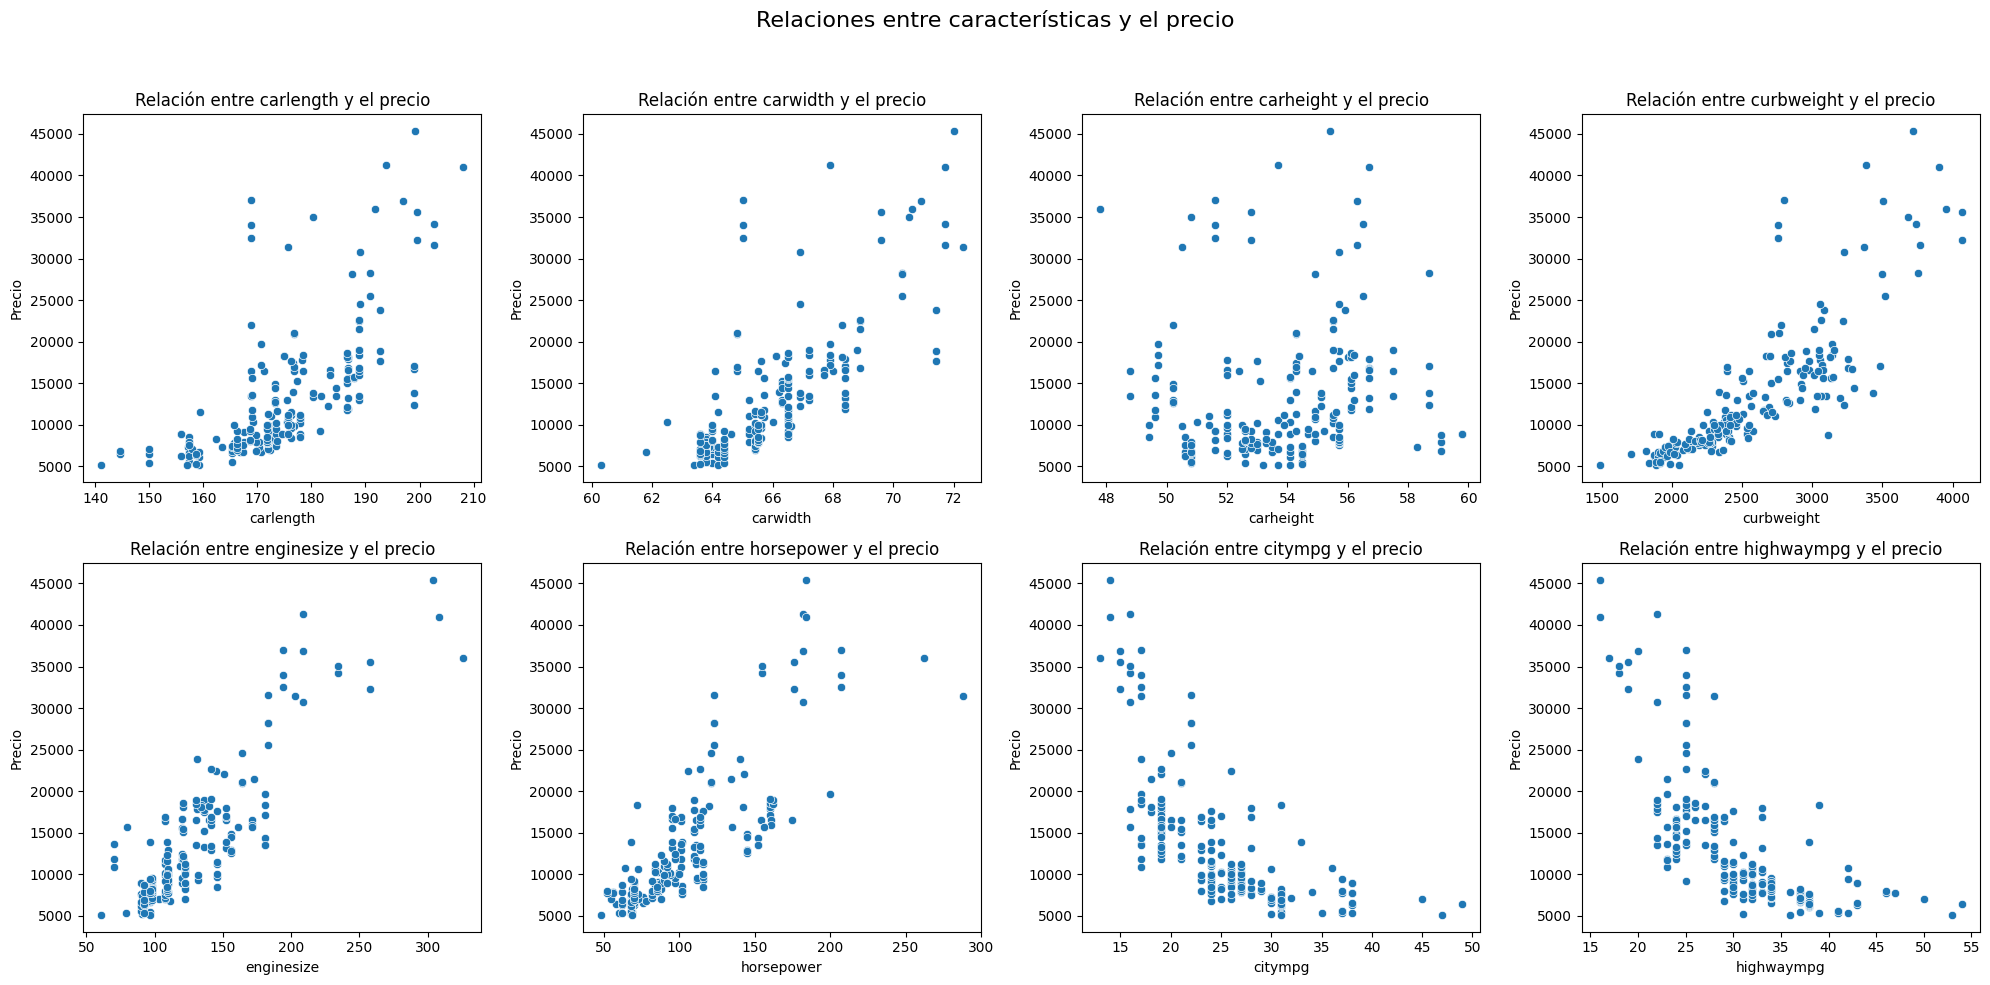

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas para comparar con el precio
variables = ['carlength', 'carwidth', 'carheight', 'curbweight', 
             'enginesize', 'horsepower', 'citympg', 'highwaympg']

# Crear subplots de 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Relaciones entre características y el precio', fontsize=16)

# Recorrer las variables y generar los scatterplots
for i, var in enumerate(variables):
    row = i // 4  # Determinar la fila (0 o 1)
    col = i % 4   # Determinar la columna (0 a 3)
    sns.scatterplot(x=var, y='price', data=cars, ax=axes[row, col])
    axes[row, col].set_title(f'Relación entre {var} y el precio')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Precio')

# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Aquí se visualizan claramente las relaciones entre algunas características numéricas de los vehículos y el precio. Los diagramas de dispersión muestran cómo variables como el tamaño del motor (enginesize), el peso (curbweight), y la potencia (horsepower) tienen una correlación positiva notable con el precio, mientras que características como el consumo en ciudad (citympg) y en carretera (highwaympg) presentan una tendencia inversa.

Estos gráficos me servirán para continuar el análisis exploratorio y comprender qué variables tienen mayor impacto en la predicción del precio, lo cual es esencial para avanzar hacia los modelos de clasificación y regresión.

**Gráficos para Variables Categóricas**

- **Gráficos de Dispersión (boxplot)**

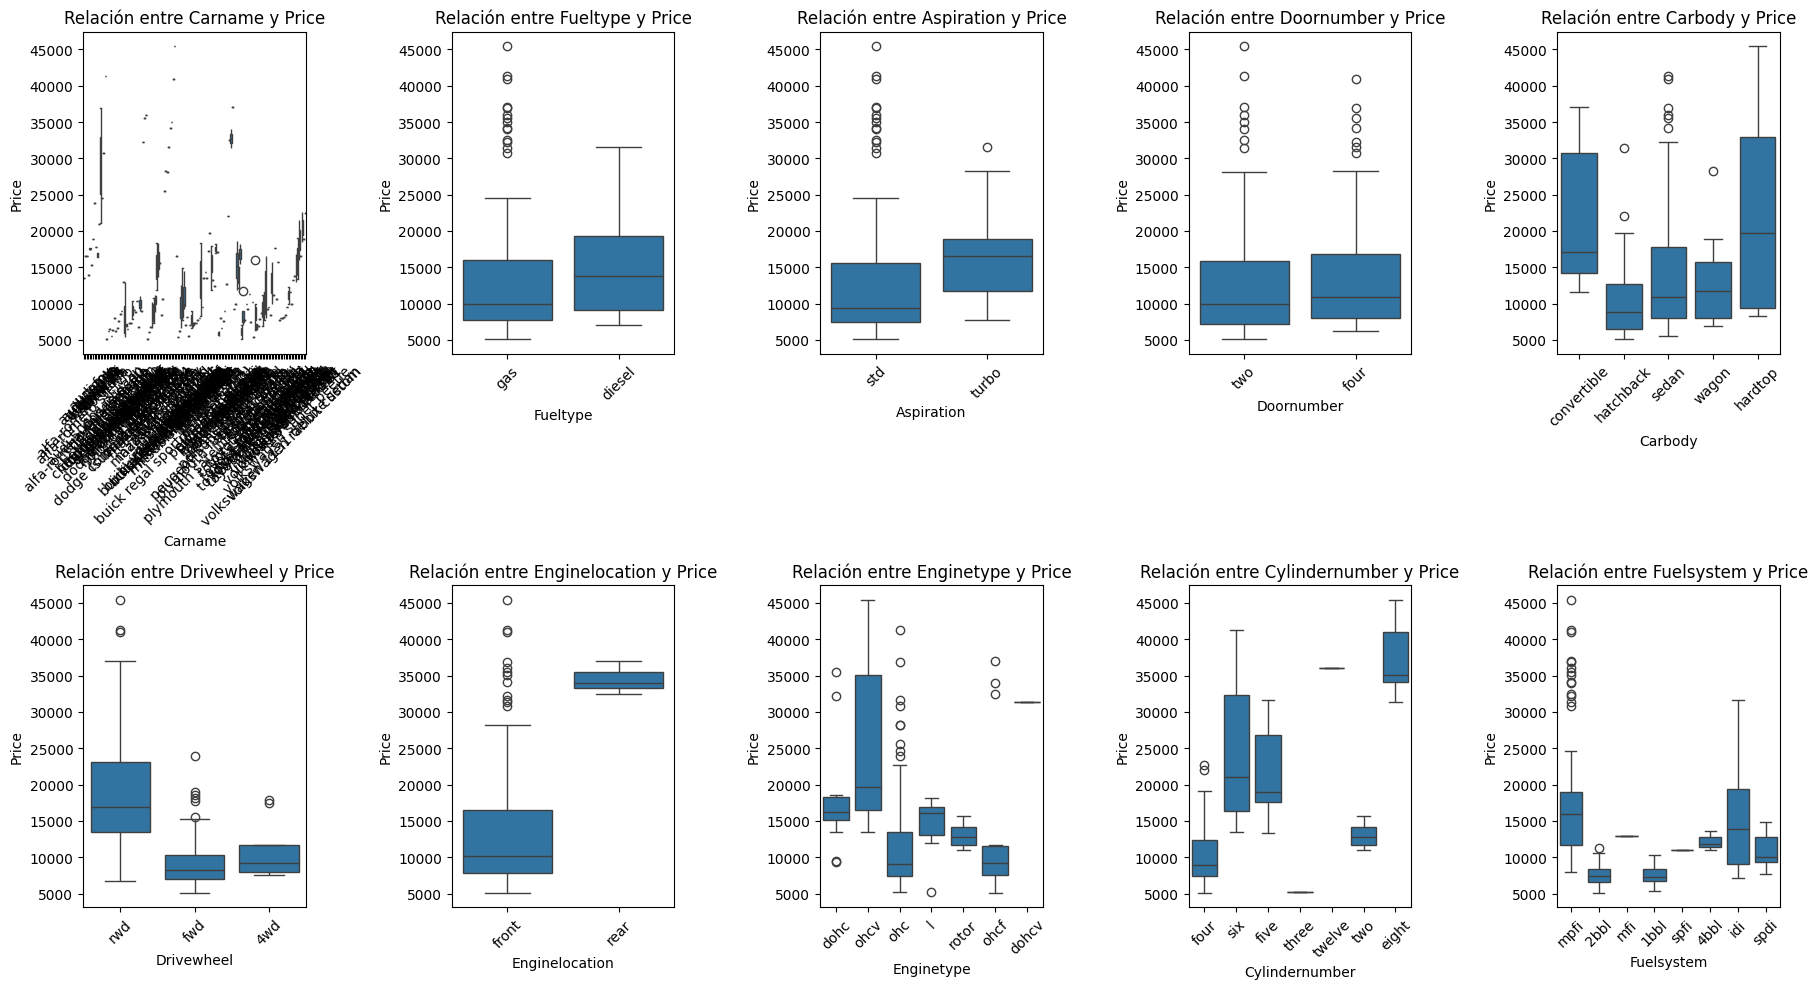

In [30]:
# Variables categóricas que quieres analizar en relación con el precio
variables = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
plt.figure(figsize=(18, 10))

# Loop para generar boxplots
for i, var in enumerate(variables, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=cars, x=var, y='price')
    plt.title(f'Relación entre {var.capitalize()} y Price')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rota los labels del eje X para mejor legibilidad

plt.tight_layout()
plt.show()


En estos gráficos puedo ver cómo varían los precios de los autos según distintas características. Por ejemplo, los autos con motor en la parte trasera (*enginelocation*) o aquellos con tracción trasera (*drivewheel*) tienden a tener precios más altos. También noto que los autos con aspiración tipo *turbo* tienden a ser más caros que los de aspiración estándar. Esta información me será útil para analizar la relación entre estas variables categóricas y el precio, lo cual podría ayudar a mejorar las predicciones en mi proyecto.

- **Matriz de Correlación con Máscara:**

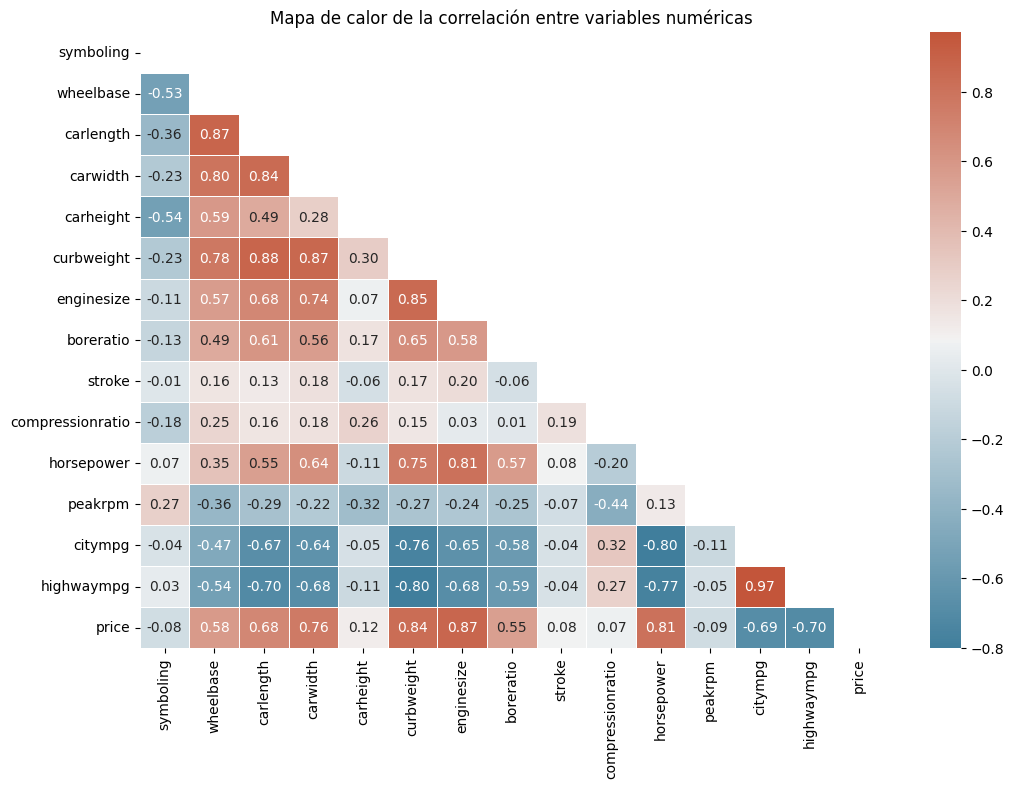

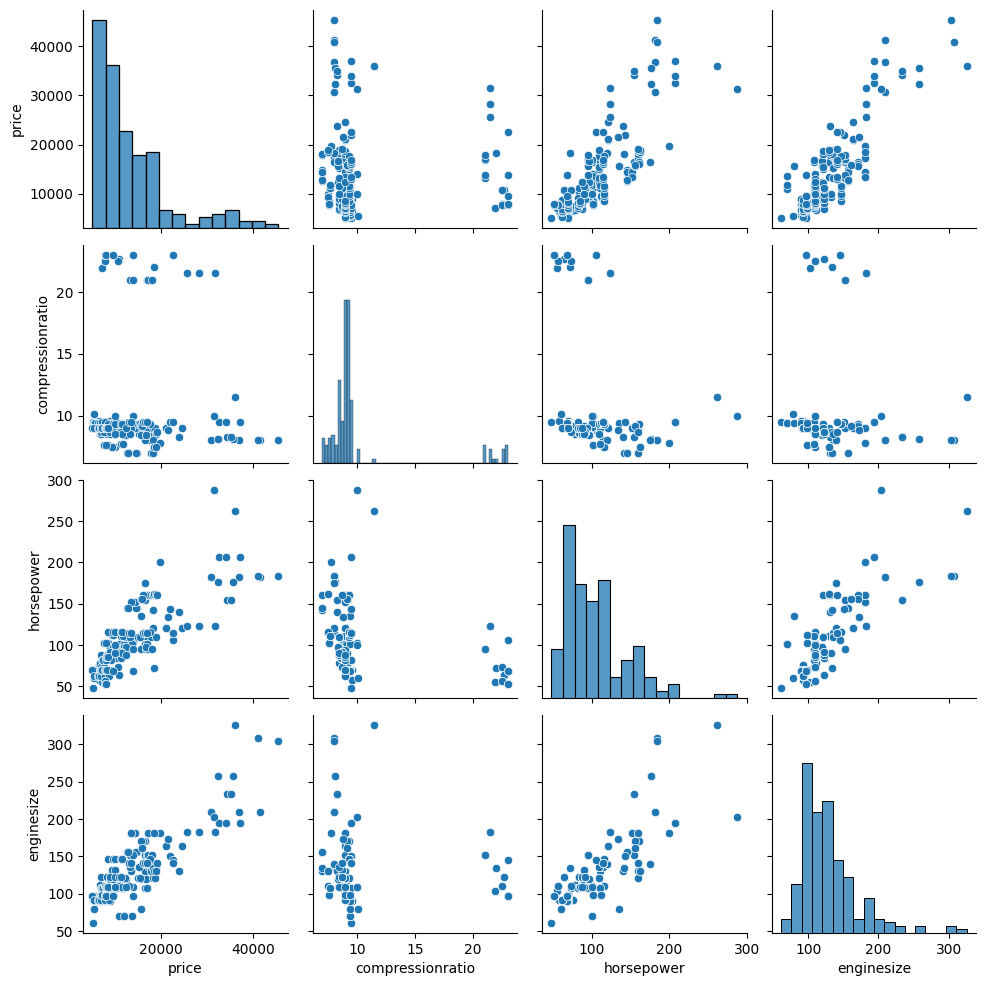

In [31]:
# Excluir la columna 'car_ID'
numeric_columns = cars.drop('car_ID', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

# Scatter plot con colores de la matriz de correlación
cols = ['price', 'compressionratio', 'horsepower', 'cylindernumber', 'enginesize']
sns.pairplot(cars[cols], height=2.5)
plt.show()


Al revisar el gráfico de pares, puedo ver claramente que existe una relación positiva entre `enginesize`, `horsepower` y el precio: a mayor tamaño del motor y potencia, el precio también tiende a aumentar. Sin embargo, otras variables como la relación de compresión (`compressionratio`) no parecen tener una relación tan evidente con el precio.

Estos patrones sugieren que las variables relacionadas con el motor tienen una mayor influencia en el valor de los vehículos, lo cual es útil para la fase de modelamiento, donde podría priorizar estas características. Además, es importante considerar posibles problemas de multicolinealidad entre las variables como `enginesize` y `horsepower`, que presentan una correlación entre sí.

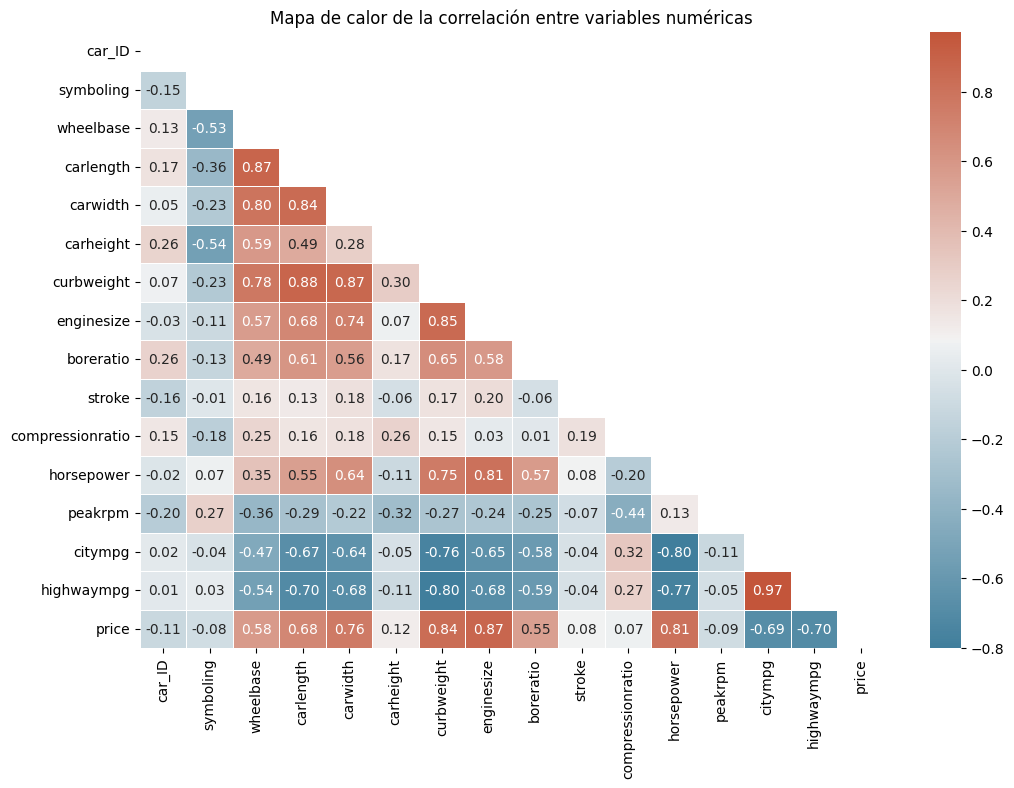

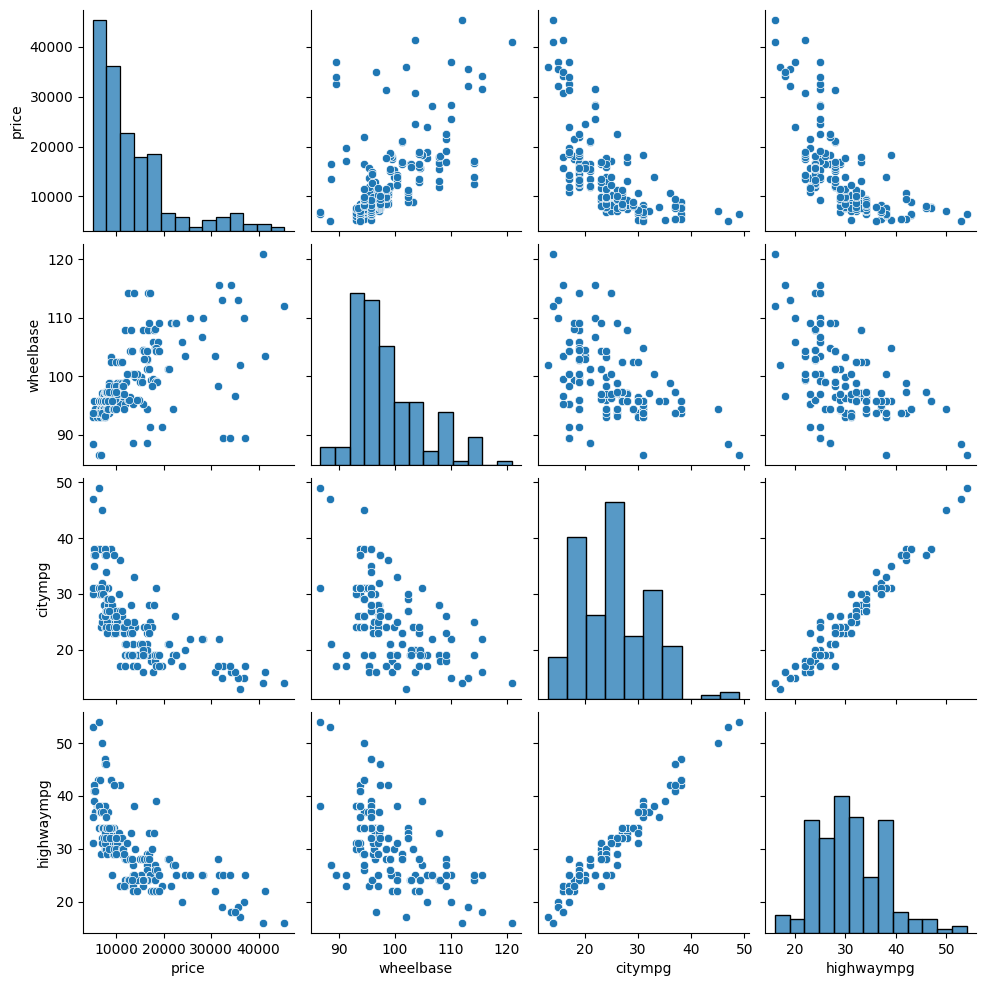

In [32]:
# Excluir la columna 'car_ID' (si 'car_id' no existe en el dataset)
numeric_columns = cars.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

# Scatter plot con las columnas seleccionadas
cols = ['price', 'doornumber', 'wheelbase', 'citympg', 'highwaympg']
sns.pairplot(cars[cols], height=2.5)
plt.show()


Puedo observar que hay una alta correlación entre varias características numéricas y el precio de los automóviles, como por ejemplo, el tamaño del motor (*enginesize*), el peso en vacío (*curbweight*) y el ancho del vehículo (*carwidth*). Estas relaciones son cruciales, ya que pueden ayudar a predecir con precisión el precio del automóvil en los modelos que estoy por desarrollar. También veo que hay una correlación negativa significativa con el consumo de combustible en ciudad (*citympg*) y en carretera (*highwaympg*), lo que podría indicar que los vehículos más caros tienden a ser menos eficientes en el consumo de combustible.

**Conclusion final**

A partir del análisis exploratorio de los datos, he identificado varios puntos clave que serán útiles para el preprocesamiento:

Primero, observé que algunas variables numéricas, como *enginesize*, *horsepower*, y *curbweight*, tienen una relación positiva con el precio. Estas variables probablemente serán importantes para el modelado, así que me aseguraré de no perder información relevante al procesarlas. También noté la presencia de valores atípicos en variables como *price*, *enginesize* y *compressionratio*. Estos outliers podrían influir en el rendimiento de los modelos, por lo que evaluaré si es necesario tratarlos o eliminarlos.

En cuanto a las variables categóricas, he visto que *drivewheel* y *aspiration* muestran una clara influencia en el precio, por lo que podrían requerir ser transformadas mediante codificación, como *One-Hot Encoding*, para su uso en modelos predictivos.

En resumen, para el preprocesamiento, tengo en cuenta:
- La posible eliminación o tratamiento de outliers.
- La estandarización o normalización de variables numéricas clave.
- La codificación adecuada de las variables categóricas más influyentes.

Todo esto me permitirá preparar los datos de manera que maximice la eficiencia de los modelos predictivos.